<a href="https://colab.research.google.com/github/lahiiru/colab-test/blob/master/Alpha_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144
import numpy as np

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

df = pd.read_csv('ticker.csv')
df.head()

col_transformer = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('scaler', StandardScaler(), slice(0, df.shape[1] - 1)) # first 6 columns
    ]
)

col_transformer.fit(df)
dft = col_transformer.transform(df)
df = pd.DataFrame(dft, columns=df.columns)
df.describe()

,date,close_price,close_vwap,open_gap,steep_rate,highest_high,t_highest_high,rel_loc_hh,lowest_low,t_lowest_low,rel_loc_ll,interval_pr_ch_1,interval_pr_ch_2,interval_pr_ch_3,interval_pr_ch_4,interval_pr_ch_5,interval_pr_ch_6,interval_pr_ch_7,interval_pr_ch_8,pr_ch_1,pr_ch_2,pr_ch_3,pr_ch_4,pr_ch_5,pr_ch_6,pr_ch_7,pr_ch_8,interval_vwap_ch_1,interval_vwap_ch_2,interval_vwap_ch_3,interval_vwap_ch_4,interval_vwap_ch_5,interval_vwap_ch_6,interval_vwap_ch_7,interval_vwap_ch_8,vwap_ch_1,vwap_ch_2,vwap_ch_3,vwap_ch_4,vwap_ch_5,vwap_ch_6,vwap_ch_7,vwap_ch_8
count,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2.495000e+03,2495.000000
mean,4.693080e-14,-1.501805e-17,-1.628624e-17,-2.758871e-17,-2.758871e-18,3.470838e-17,-3.435239e-17,-1.228143e-17,1.433723e-16,7.377755e-17,-8.372283e-17,-2.349490e-17,1.779917e-19,2.064703e-17,1.441733e-17,-4.627783e-18,-2.554180e-17,1.922310e-17,2.311667e-17,-2.349490e-17,-2.180398e-17,1.308239e-17,-1.047926e-17,1.432833e-17,6.407700e-18,2.652076e-17,1.584126e-17,-9.789542e-18,1.428800e-17,-8.009625e-19,1.383885e-17,-1.447851e-17,2.069153e-17,2.020205e-17,1.415034e-17,1.851113e-17,-9.789542e-18,3.559833e-19,-4.449792e-19,1.628624e-17,-6.229708e-19,4.805775e-18,-0.000090
std,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,0.003377
min,-1.652232e+00,-6.736749e+00,-5.271613e+00,-1.060055e+01,-5.527945e+00,-9.368273e-01,-1.140187e+00,-1.023840e+00,-1.026398e+01,-1.049398e+00,-9.277376e+00,-1.140789e+01,-8.607579e+00,-8.910489e+00,-1.033747e+01,-8.184605e+00,-9.939413e+00,-6.802349e+00,-6.859512e+00,-1.140789e+01,-5.479085e+00,-6.969618e+00,-7.564264e+00,-7.674359e+00,-7.539498e+00,-4.840136e+00,-4.885038e+00,-8.600217e+00,-6.585388e+00,-6.260233e+00,-8.442693e+00,-9.356258e+00,-9.525627e+00,-9.101161e+00,-7.112677e+00,-1.140129e+01,-8.600217e+00,-6.593887e+00,-6.783401e+00,-7.787896e+00,-7.784994e+00,-7.500350e+00,-0.024348
25%,-9.422658e-01,-4.214558e-01,-4.388176e-01,-2.192158e-01,-6.850421e-01,-6.332769e-01,-9.580051e-01,-5.898259e-01,-3.005835e-01,-9.216566e-01,-3.156129e-01,-4.911408e-01,-4.369169e-01,-4.884283e-01,-4.083418e-01,-4.580883e-01,-4.067125e-01,-4.323211e-01,-3.932727e-01,-4.911408e-01,-5.288424e-01,-5.189207e-01,-4.706086e-01,-4.600812e-01,-4.599432e-01,-4.444679e-01,-4.582723e-01,-4.598266e-01,-4.151063e-01,-4.101939e-01,-3.640007e-01,-3.043405e-01,-2.624624e-01,-2.673978e-01,-2.655110e-01,-4.623009e-01,-4.598266e-01,-4.864159e-01,-4.866413e-01,-4.883184e-01,-4.785581e-01,-4.704000e-01,-0.001675
50%,7.178249e-02,3.762769e-02,4.670957e-02,-4.147733e-02,2.801539e-01,-2.862285e-01,-2.900059e-01,-2.649638e-01,3.391459e-01,-3.468212e-01,2.906131e-01,8.956897e-03,1.171385e-02,6.167809e-02,5.006963e-02,1.594656e-02,3.277347e-02,6.863723e-03,3.069349e-02,8.956897e-03,1.678116e-02,3.403928e-02,3.970157e-02,4.148259e-02,4.057672e-02,3.702989e-02,4.108974e-02,2.069761e-02,5.014416e-02,9.063508e-02,1.009922e-01,1.016711e-01,2.439293e-02,3.460479e-03,-2.440837e-03,6.557520e-03,2.069761e-02,1.555605e-02,2.612253e-02,2.795526e-02,3.561650

In [0]:
Xt = df.drop(['date', 'close_price', 'close_vwap'], 1)
y = df[['close_price']]
df = pd.concat([X, y], axis=1)

column_names = Xt.columns
df.shape, X.shape, y.shape

df.isnull().values.any()

NameError: ignored

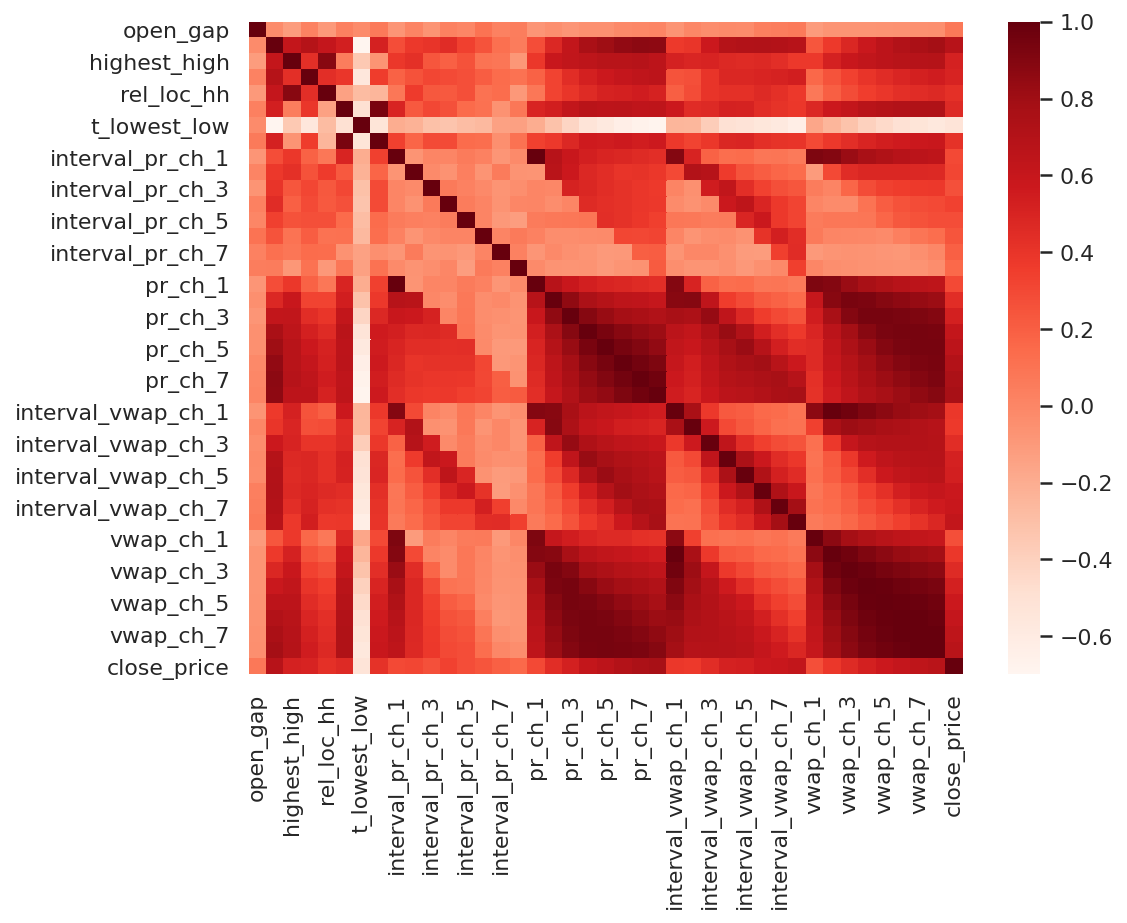

In [0]:
plt.figure(figsize=(8,6))

cor = df.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

Text(0, 0.5, 'Second Principal Component')

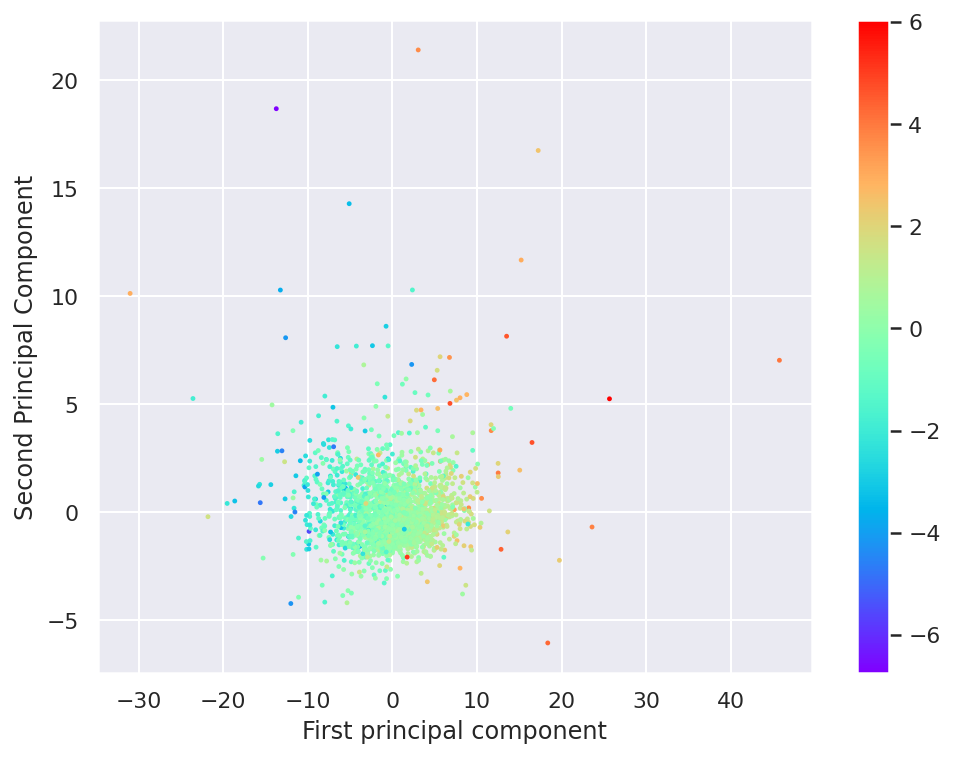

In [0]:
from sklearn.decomposition import PCA
# y.describe()
pca = PCA(n_components=3)
model = pca.fit(Xt)
pd.DataFrame(model.components_, columns=column_names)

x_pca = model.transform(Xt)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,2],c=y['close_price'],cmap='rainbow', s=2)
plt.colorbar()
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

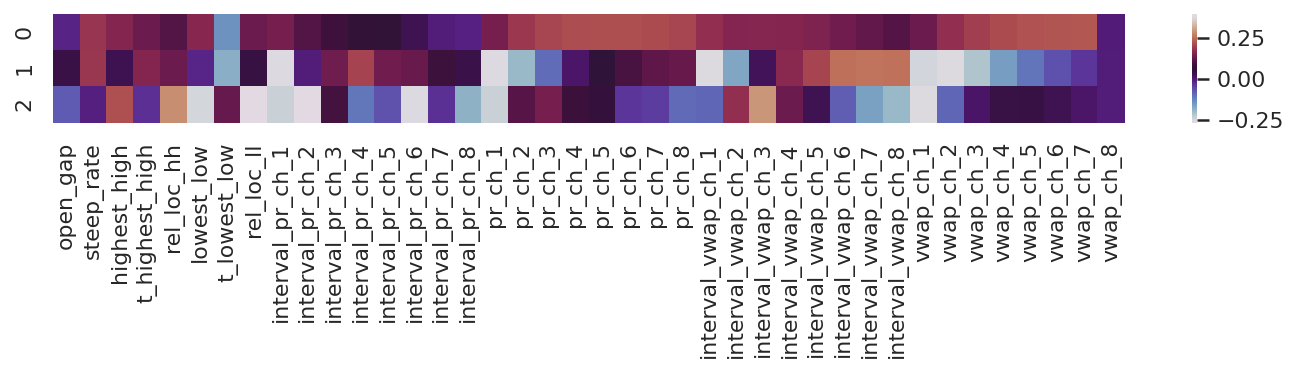

In [0]:
map= pd.DataFrame(pca.components_,columns=column_names)
plt.figure(figsize=(12,1))
sns.heatmap(map,cmap='twilight')

Best alpha using built-in LassoCV: 0.025317
Best score using built-in LassoCV: 0.606490
Lasso picked 10 variables and eliminated the other 30 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

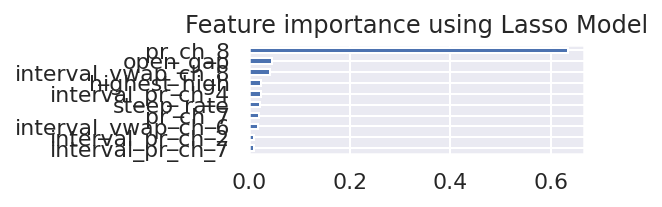

In [0]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(Xt, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()[-sum(coef != 0):]
import matplotlib
matplotlib.rcParams['figure.figsize'] = (3, 1)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In 0.608618936342648
Out 0.5932072520293615


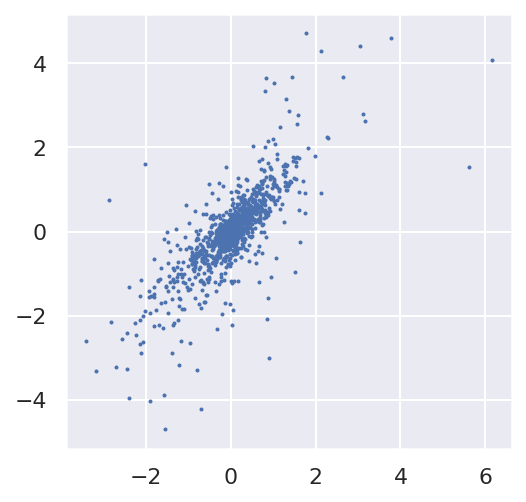

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(Xt[['pr_ch_8', 'open_gap', 'interval_vwap_ch_8']], y, test_size=0.4, random_state=5)

model = Pipeline([('poly', PolynomialFeatures(degree=1)), ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('In', model.score(X_train, y_train))
print('Out', model.score(X_test, y_test))

matplotlib.rcParams['figure.figsize'] = (4, 4)
plt.scatter(y_pred, y_test, s=1)
#r2_score(y_test, y_pred)

dict_keys(['memory', 'steps', 'verbose', 'poly', 'ridge', 'poly__degree', 'poly__include_bias', 'poly__interaction_only', 'poly__order', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])
Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    1.1s


{'poly__degree': 1, 'ridge__alpha': 2}
In 0.48237960066587704
Out 0.4587689084262365


[Parallel(n_jobs=5)]: Done 315 out of 315 | elapsed:    4.9s finished


0.4587689084262365

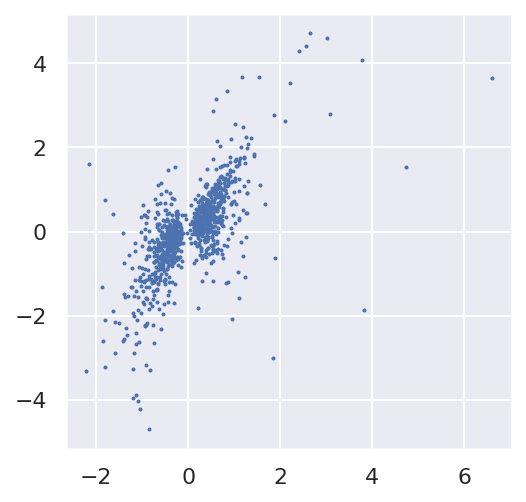

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(Xt[['steep_rate', 'open_gap', 'rel_loc_hh']], y, test_size=0.4, random_state=5)

model = Pipeline([('poly', PolynomialFeatures()), ('ridge', Ridge(alpha=1))])
print(model.get_params().keys())
gs = GridSearchCV(model,
                  {'poly__degree': range(1, 10), 'ridge__alpha': [0.01, 0.1, 1, 2, 5, 10, 100]},
                  cv=5,
                  n_jobs=5,
                  scoring='r2',
                  verbose=True)

gs.fit(Xt[['steep_rate', 'open_gap', 'rel_loc_hh']], y)
print(gs.best_params_)

model = model = gs.best_estimator_
model = model.fit(X_train, y_train)
y_pred = gs.predict(X_test)

print('In', model.score(X_train, y_train))
print('Out', model.score(X_test, y_test))

matplotlib.rcParams['figure.figsize'] = (4, 4)
plt.scatter(y_pred, y_test, s=1)
r2_score(y_test, y_pred)